In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from matplotlib.patches import Circle
from scipy.special import gamma
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import exp, sqrt
from scipy.integrate import quad, dblquad, nquad, simps
from scipy.stats import rv_continuous
from scipy.special import gamma
from scipy.interpolate import interp1d
from scipy.integrate import quad
import scipy.optimize as optimize
import matplotlib.patches as patches
from itertools import product
from scipy.integrate import quad
import scipy.optimize as optimize
from  scipy.interpolate import interp1d
from scipy.misc import derivative
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
from scipy.signal import savgol_filter
import glob
from unsio import *
import os
import wkbl
from wkbl.astro.halo_info import *
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import proj3d
from matplotlib import cm
import wkbl.astro.nbody_essentials as nbe
from iminuit import Minuit, describe, Struct
import probfit
import cfalcon
CF =cfalcon.CFalcon()
from matplotlib.colors import LogNorm
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rc
import datetime
from scipy.misc import derivative
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
labelsize = 30
tickssize = 19
textsize = 15
hydro = MochimaHydro()
dmo = Mochimadmo()
center_in_pot=True
path2file = "/home/arturo/Documents/LAM/LAM2LUPM/dataFiles/profiles/"+hydro.namenospace+"/"

In [3]:

simname = hydro.name
pathsim = hydro.path
#path = "/media/arturo/ARTUROTECA/OUTPUTS/HaloB/output_00417"
myhydro = wkbl.Galaxy_Hound(pathsim)
zoomreg = np.where(myhydro.dm.mass==myhydro.dm.mass.min())
centro = nbe.real_center(myhydro.dm.pos3d[zoomreg],myhydro.dm.mass[zoomreg])

myhydro.center_shift(centro)
myhydro.r_virial(600,n=2.5)
myhydro.r200
myhydro.redefine(2.5)

loading Dark matter..
loading Stars..
no stars log
loading Gas..
| r_200 = 212.70
| Diagonal matrix computed 
|    | 20, 0, 0|
| D =| 0, 14, 0|
|    | 0,  0, 4|


In [5]:
if (center_in_pot):
    myGkpc = 6.673e-11*((1e-3/myhydro.p.kpctokm)**3)*myhydro.p.msuntokg#kpc^ 3 Msun^-1 s^-2
    pos = np.array(myhydro.dm.pos3d.reshape(len(myhydro.dm.pos3d)*3),dtype=np.float32)#*myhydro.p.kpctokm
    ok, acc, Phy = CF.getGravity(pos,myhydro.dm.mass,0.190,G=myGkpc)
    center_pot = myhydro.dm.pos3d[np.where(Phy==Phy.min())]
    print center_pot
    myhydro.center_shift(center_pot)
    myhydro.r_virial(600,n=2.5)
    myhydro.r200
    myhydro.redefine(2.5)

[[ 0.09112269 -0.00304426  0.02828041]]
| r_200 = 212.70
| Diagonal matrix computed 
|    | 20, 0, 0|
| D =| 0, 14, 0|
|    | 0,  0, 4|


In [6]:
ok,myhydro.dm.rho,_= CF.getDensity(np.array(myhydro.dm.pos3d.reshape(len(myhydro.dm.pos3d)*3),dtype=np.float32), myhydro.dm.mass)


In [8]:
Pcrit = myhydro.dm._p.rho_crit
Mdm = myhydro.dm.mass.min()
myradiuses = myhydro.dm.r[np.argsort(myhydro.dm.r)]
tabN = np.cumsum(np.ones(len(myradiuses)))[1:]
myradiuses = myradiuses[1:]
Rp03 = np.sqrt(200/64.) * np.sqrt(4 * np.pi * Pcrit * tabN / 3. / Mdm ) * (myradiuses**1.5)/ np.log(tabN) 
val =0.6
R_P03 = myradiuses[ np.where(Rp03 > val) ][0]


print R_P03
hsml= 0.190# R_P03
# R array logarithmic Bining
r_p = np.linspace(np.log10(0.2*hsml),np.log10(10),15)
# histogram of dm particles per logarithmic bin
n_dm,r = np.histogram(myhydro.dm.r,bins=r_p)
# edges of bins
r1,r2 =r[:-1],r[1:]
# shell's volume
vol = 4.* np.pi * ((r2**3)-(r1**3)) / 3.
r_size = r_p[1:]-r_p[:-1]
# density per shell
profileDMO_in = n_dm*myhydro.dm.mass.min()/vol
# center of bins
r_in = (r_p[:-1]+r_p[1:])/2.


# R array logarithmic Bining
r_p = np.logspace(np.log10(hsml),np.log10(2.5*myhydro.r200),150)
# histogram of dm particles per logarithmic bin
n_dm,r = np.histogram(myhydro.dm.r,bins=r_p)
# edges of bins
r1,r2 =r[:-1],r[1:]
# shell's volume
vol = 4.* np.pi * ((r2**3)-(r1**3)) / 3.
r_size = r_p[1:]-r_p[:-1]
# density per shell
profileDMO = n_dm*myhydro.dm.mass.min()/vol
# center of bins
r = (r_p[:-1]+r_p[1:])/2.
bin_size= (r_p[:-1]-r_p[1:])/2.
rr = r


Delta_rho = (myhydro.dm.mass.min() /vol) + (4*np.pi*(r**2)* (n_dm*myhydro.dm.mass.min()) * r_size / vol**2)
Delta_rho2 = np.sqrt((myhydro.dm.mass.min()/np.sqrt(n_dm) /vol)**2 + (4*np.pi*(r**2)* (n_dm*myhydro.dm.mass.min()) * r_size / vol**2)**2)
Delta_rho3 =(4*np.pi*(r**2)* (n_dm*myhydro.dm.mass.min()) * r_size / vol**2)
Delta_rho4 =(myhydro.dm.mass.min() /vol)

# extra estatistics from Cfalcon density
mean = np.array([])
std = np.array([])
n=np.array([])
for i in range(len(r_p)-1):
    shell = np.where((myhydro.dm.r > r_p[i])&(myhydro.dm.r < r_p[i+1])&(myhydro.dm.r > hsml))
    n = np.append(n,len(shell[0]))
    mean = np.append(mean,np.mean(myhydro.dm.rho[shell]))
    std = np.append(std,np.std(myhydro.dm.rho[shell]))
    

m_obs = n_dm*myhydro.dm.mass.min()
n = np.array([len(myhydro.dm.mass[myhydro.dm.r<i]) for i in r]) 

2.2598432759994833


In [9]:
def abg_logprofile(x,p_s,r_s,al,be,ga):
    x = 10**x
    power =  (be - ga) / (al)
    denominator = ((x/(r_s))**ga) * ((1 + (x / (r_s))**al)**power)
    return np.log10(10**p_s / denominator)

def abg_profile(x,po,r_s,al,be,ga):
    power =  (be - ga) / al
    denominator = ((x/r_s)**ga) * ((1 + (x / r_s)**al)**power)
    return (10**po) / denominator

def chi2_mass(po,r_s,al,be,ga):
    """
    logarithmic Chi-square
    using the full mass inside a radius R
    """
    def my_int(R):
        r_test = np.logspace(np.log10(hsml),np.log10(R),100)
        rho_test = 4* np.pi * (r_test**2) * abg_profile(r_test,po,r_s,al,be,ga)
        return simps(rho_test,r_test)
    expected = np.array([my_int(i) for i in r])
    c = (np.log10(m_obs)- np.log10(expected))/ (np.log10(m_obs)-0.5*np.log10(n))
    c = c**2
    return np.sum(c)

def chi2_mass_bin(po,r_s,al,be,ga):
    """
    logarithmic Chi-square
    using the full mass inside a shell
    between Ri and Rf
    """
    def my_int(Ri,Rf):
        r_test = np.logspace(np.log10(Ri),np.log10(Rf),100)
        rho_test =  (r_test**2) * abg_profile(r_test,po,r_s,al,be,ga)
        return 4* np.pi * simps(rho_test,r_test)
    expected = np.array([my_int(r_p[i],r_p[i+1]) for i in range(len(r))])
    c = (np.log10(m_obs)- np.log10(expected))#/ (np.log10(m_obs)-0.5*np.log10(n))
    c = c**2
    return np.sum(c)



def chi2_rho(po,r_s,al,be,ga):
    """
    logarithmic Chi-square
    using mean of rho per shell
    """
    rho_obs = profileDMO
    rho_the = np.array([abg_profile(i,po,r_s,al,be,ga) for i in r])
    c = (np.log10(rho_the) - np.log10(rho_obs))/ np.log10(std)
    c = c**2
    return np.sum(c)

In [10]:

m_rho = Minuit(chi2_rho, al=1., fix_al=True,
         po=7.0,    error_po=0.01,  limit_po =(6.,11.),
         r_s=19.3,  error_r_s=0.1,   limit_r_s=(1.,52),
         be=3.,     error_be=0.01,   limit_be =(2.5,3.5),
         ga=1.,     error_ga=0.01,   limit_ga =(.5,1.5))
m_rho.migrad();

FCN = nan 
 TOTAL NCALL = 60 
 NCALLS = 60 
 
 
 EDM = nan 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Hesse Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 Fixed? 
 
 
 0 
 po 
 nan 
 nan 
 
 
 6 
 11 
 No 
 
 
 1 
 r_s 
 nan 
 nan 
 
 
 1 
 52 
 No 
 
 
 2 
 al 
 1 
 1 
 
 
 
 
 Yes 
 
 
 3 
 be 
 nan 
 nan 
 
 
 2.5 
 3.5 
 No 
 
 
 4 
 ga 
 nan 
 nan 
 
 
 0.5 
 1.5 
 No 
 
 
 
 
\begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Hesse Error & Minos Error- & Minos Error+ & Limit- & Limit+ & Fixed?\\
\hline
0 & po & nan & nan & & & 6.0 & 11 & No\\
\hline
1 & $r_{s}$ & nan & nan & & & 1.0 & 52 & No\\
\hline
2 & al & 1 & 1 & & & & & Yes\\
\hline
3 & be & nan & nan & & & 2.5 & 3.5 & No\\
\hline
4 & ga & nan & nan & & & 0.5 & 1.5 & No\\
\hline
\end{tabular}

In [11]:
m_bin = Minuit(chi2_mass_bin,  al=1., fix_al=True,
          po=8.0,    error_po=0.01,  limit_po =(2.,15.),
         r_s=20.3,  error_r_s=0.1,   limit_r_s=(10,25),
         be=3.,     error_be=0.01,   limit_be =(2.9,3.1),
         ga=1.,     error_ga=0.01,   limit_ga =(0.01,2.))
m_bin.migrad();

FCN = inf 
 TOTAL NCALL = 60 
 NCALLS = 60 
 
 
 EDM = nan 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Hesse Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 Fixed? 
 
 
 0 
 po 
 nan 
 nan 
 
 
 2 
 15 
 No 
 
 
 1 
 r_s 
 nan 
 nan 
 
 
 10 
 25 
 No 
 
 
 2 
 al 
 1 
 1 
 
 
 
 
 Yes 
 
 
 3 
 be 
 nan 
 nan 
 
 
 2.9 
 3.1 
 No 
 
 
 4 
 ga 
 nan 
 nan 
 
 
 0.01 
 2 
 No 
 
 
 
 
\begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Hesse Error & Minos Error- & Minos Error+ & Limit- & Limit+ & Fixed?\\
\hline
0 & po & nan & nan & & & 2.0 & 15 & No\\
\hline
1 & $r_{s}$ & nan & nan & & & 10.0 & 25 & No\\
\hline
2 & al & 1 & 1 & & & & & Yes\\
\hline
3 & be & nan & nan & & & 2.9 & 3.1 & No\\
\hline
4 & ga & nan & nan & & & 0.01 & 2 & No\\
\hline
\end{tabular}

<IPython.core.display.Javascript object>


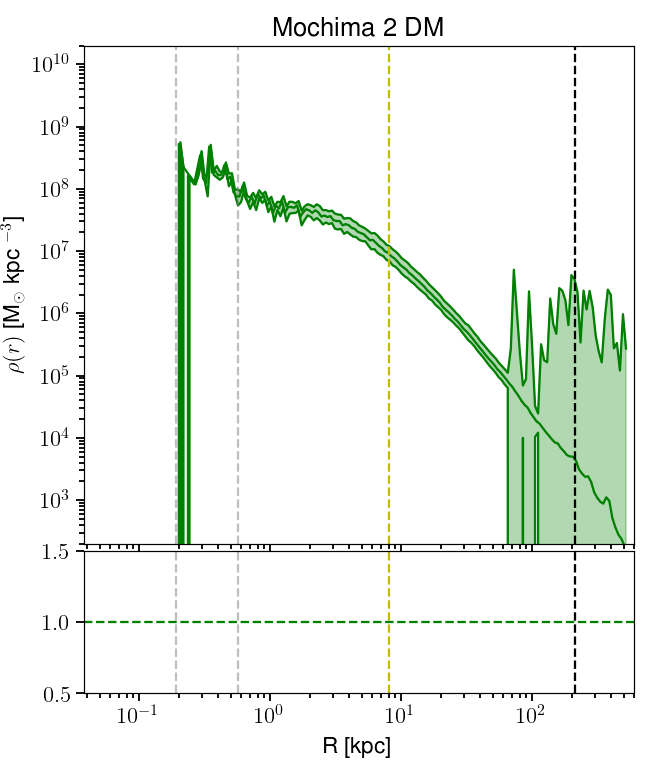

In [12]:
fig, [ax,ax1] = plt.subplots(2,1,gridspec_kw = {'height_ratios':[3.5, 1]},figsize=[6,7])
ax.set_xlim([0.2*hsml,600])
ax1.set_xlim([0.2*hsml,600])
ax1.set_ylim([.5,1.5])
ax.set_ylim([2e2,2e10])
ax.set_xscale('log')
ax1.set_xscale('log')
ax.set_yscale('log')
ax1.set_xlabel('R [kpc]',fontsize=15)
ax.set_ylabel(r'$\rho(r)$ [M$_{\odot}$ kpc $^{-3}$]',fontsize=15)
ax.set_title("Mochima 2 DM",fontsize=17)

#define sigma pluss and sigma minus lines
mean_plus = profileDMO+std
mean_minu = profileDMO-std

#  plot things
#ax.scatter(myhydro.dm.r,myhydro.dm.rho,s=0.02,lw=0,alpha=0.6,c='#FF9100')
mean_minu[np.isnan(np.log10(mean_minu))] = 0
ax.plot(r[~np.isnan(np.log10(mean_plus))],mean_plus[~np.isnan(np.log10(mean_plus))],
        c='g')
ax.plot(r[~np.isnan(np.log10(mean_minu))],mean_minu[~np.isnan(np.log10(mean_minu))],
        c='g')

ax.fill_between(r,mean_plus,mean_minu,color="g",alpha=0.3)
#ax.errorbar(r,profileDMO,xerr=bin_size,yerr=std,alpha=0.5)

#ax.scatter(myhydro.dm.r,myhydro.dm.rho,s=0.2,lw=0,alpha=0.2,c='gray')

#plot means
#ax.plot(r_p[:-1],mean,lw=1.5)
ax.plot(r_p[:-1],profileDMO,'g-o',markersize=0.1,lw=1.5)
## rho fit
ax.plot(r,(abg_profile(r,m_rho.values['po'] ,m_rho.values['r_s'],m_rho.values['al'],m_rho.values['be'],m_rho.values['ga'])),
        "k",lw=2,label=r"$\chi^2(\rho) ")
## spehere mass
#ax.plot(r,(abg_profile(r,m_SC.values['po'] ,m_SC.values['r_s'],m_SC.values['al'],m_SC.values['be'],m_SC.values['ga'])),
#        "r-",lw=2)
## shell mass
ax.plot(r[1:],(abg_profile(r[:-1],m_bin.values['po'] ,m_bin.values['r_s'],m_bin.values['al'],m_bin.values['be'],m_bin.values['ga'])),
        "r--",lw=2)



r_dm = r


#horizontal lines
ax.axvline(x=hsml,c='gray',alpha=0.5,linestyle='--',lw=1.5)
ax.axvline(x=3*hsml,c='gray',alpha=0.5,linestyle='--',lw=1.5)
ax.axvline(x=8,c='y',linestyle='--',lw=1.5) #Sun
ax.axvline(x=myhydro.r200,c='k',linestyle='--',lw=1.5) #r200

#########33

##
ax1.axhline(y=1.,color="g",linestyle="--")
## rho fit
r_local = np.logspace(np.log10(hsml),np.log10(2.5*myhydro.r200),100)
ax1.plot(r,(abg_profile(r,m_rho.values['po'] ,m_rho.values['r_s'],m_rho.values['al'],m_rho.values['be'],m_rho.values['ga']))/profileDMO,
        "k",lw=1.5,label=r"$\chi^2(\rho) ")

ax1.plot(r_in,(abg_profile(r_in,m_rho.values['po'] ,m_rho.values['r_s'],m_rho.values['al'],m_rho.values['be'],m_rho.values['ga']))/profileDMO_in,
        "k--",lw=1.5,label=r"$\chi^2(\rho) ")
## spehere mass
#ax.plot(r,(abg_profile(r,m_SC.values['po'] ,m_SC.values['r_s'],m_SC.values['al'],m_SC.values['be'],m_SC.values['ga'])),
#        "r-",lw=2)
## shell mass
ax1.plot(r,(abg_profile(r,m_bin.values['po'] ,m_bin.values['r_s'],m_bin.values['al'],m_bin.values['be'],m_bin.values['ga']))/profileDMO,
        "r-",lw=1.5)
ax1.plot(r_in,(abg_profile(r_in,m_bin.values['po'] ,m_bin.values['r_s'],m_bin.values['al'],m_bin.values['be'],m_bin.values['ga']))/profileDMO_in,
        "r--",lw=1.5)

#horizontal lines
ax1.axvline(x=hsml,c='gray',alpha=0.5,linestyle='--',lw=1.5)
ax1.axvline(x=3*hsml,c='gray',alpha=0.5,linestyle='--',lw=1.5)
ax1.axvline(x=8,c='y',linestyle='--',lw=1.5) #Sun
ax1.axvline(x=myhydro.r200,c='k',linestyle='--',lw=1.5) #r200



# layout
fig.tight_layout(h_pad=-1.65)
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax1.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax1.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)

# Savitzky-Golay Story


In [119]:
print R_P03
hsml= 0.190# R_P03
# R array logarithmic Bining
#r_p = np.linspace(3*hsml,myhydro.r200,700)
r_p = np.linspace(1,3.,55)

# histogram of dm particles per logarithmic bin
n_dm,r = np.histogram(myhydro.dm.r,bins=r_p)
# edges of bins
r1,r2 =r[:-1],r[1:]
# shell's volume
vol = 4.* np.pi * ((r2**3)-(r1**3)) / 3.
r_size = r_p[1:]-r_p[:-1]
# density per shell
profileDMO_in = n_dm*myhydro.dm.mass.min()/vol
# center of bins
r_in = (r_p[:-1]+r_p[1:])/2.

2.2598432759994833


In [121]:
window=21
delta=r_in[1]-r_in[0]
inlim = 5
ysg2 = savgol_filter(profileDMO_in[inlim:],window_length=window,polyorder=4,deriv=0)#,delta=delta)
ysg_pr1 = savgol_filter(np.log(profileDMO_in),window_length=window,polyorder=4,deriv=1,delta=delta)
ysg_pr = savgol_filter(profileDMO_in,window_length=window,polyorder=4,deriv=1,delta=delta)

<IPython.core.display.Javascript object>


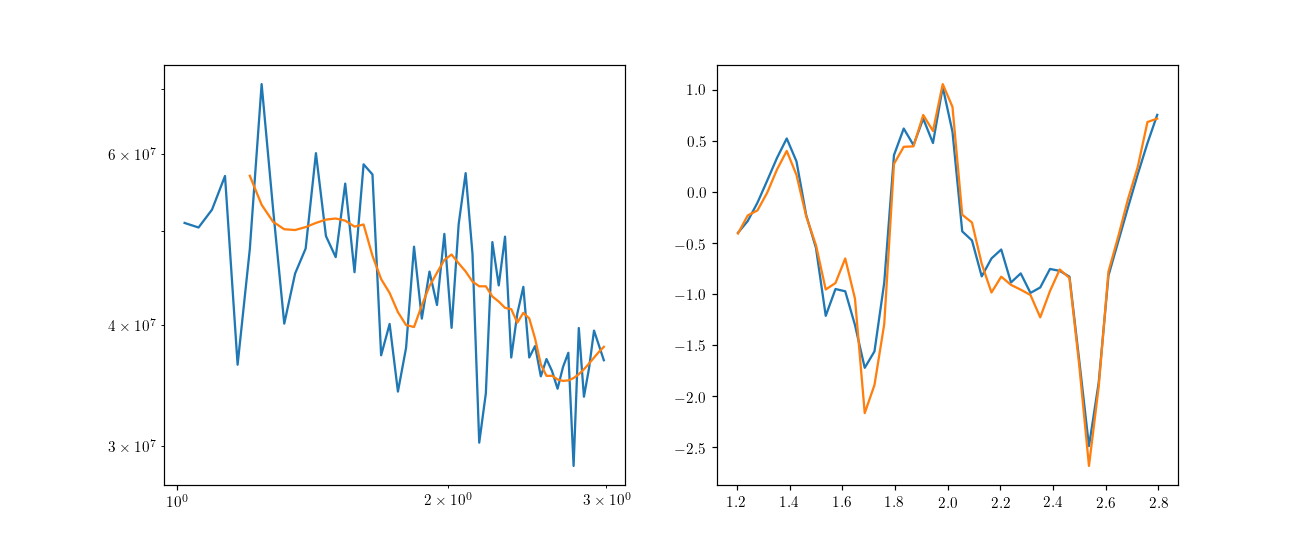

In [122]:
fig, ax = plt.subplots(1,2,figsize=[12,5])
ax[0].set_xscale('log')
#ax[1].set_xscale('log')

ax[0].set_yscale('log')

ax[0].plot(r_in, profileDMO_in)
ax[0].plot(r_in[inlim:], ysg2)
ax[1].plot(r_in[inlim:-inlim],ysg_pr1[inlim:-inlim]*r_in[inlim:-inlim])
ax[1].plot(r_in[inlim:-inlim],ysg_pr[inlim:-inlim]/profileDMO_in[inlim:-inlim] * r_in[inlim:-inlim])

#ax[1].plot(r_in, np.log(profileDMO_in)/np.log(r_in))


In [115]:

print np.mean(ysg_pr[inlim:-inlim]/profileDMO_in[inlim:-inlim] * r_in[inlim:-inlim])

-0.3864721473206858


In [18]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [19]:
len(profileDMO[7:100])

93

In [421]:
rR500 = r_p / myhydro.r500
#valid = np.where((rR500 < 0.0043)&(rR500 > 0.002)) 
valid = np.where((rR500 > 0.0035)&(rR500 < 1.29)) 
len(r_p[valid])
#r_p[valid]

147

In [422]:
lnrho
print lnr[1]-lnr[0]
print lnr[7]-lnr[6]

0.01658083369466823
0.01658083369466823


<IPython.core.display.Javascript object>


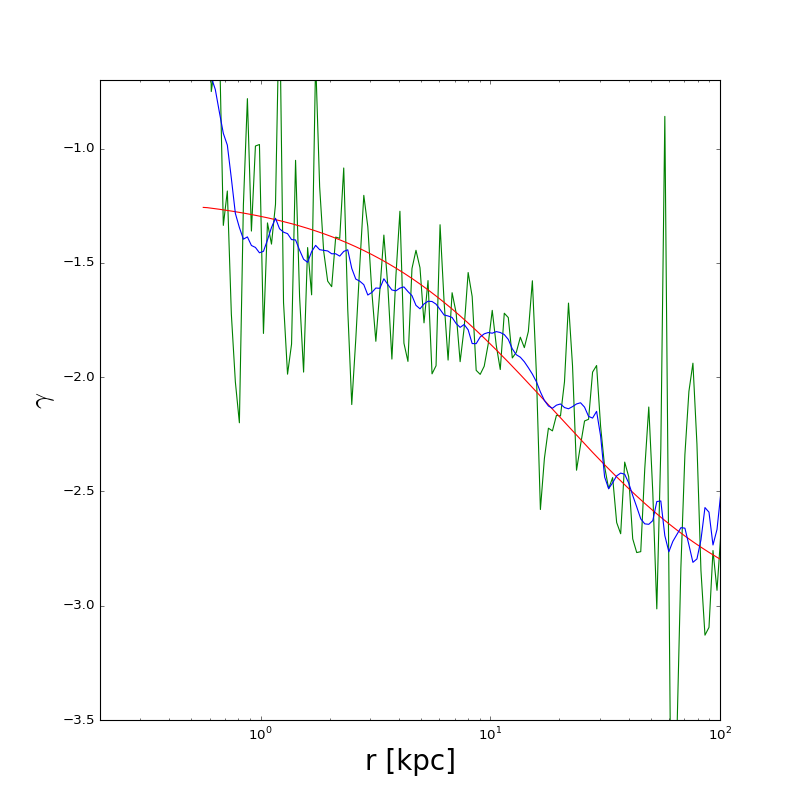

0.030768899736208916
151 25
0.030768899736208916
151 25


In [435]:
fig, ax = plt.subplots(figsize=[10,10])
ax.set_ylim([-3.5,-0.7])
ax.set_xlim([0.2,100])
ax.set_xlabel('r [kpc]', fontsize=25)
ax.set_ylabel(r'$\gamma$', fontsize=25)
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.plot(r_p[7:100-1],profileDMO[7:100])
#ax.plot(r_p[valid],np.log10(profileDMO[valid])/np.log10(r_p[valid]))
x = np.log(r_p[valid])
y = np.log(profileDMO[valid])#/np.log(r_p[valid])
dy = np.gradient(y)
dx = np.gradient(x)
dlnp = np.gradient(np.log(abg_profile(r_p[valid],m_bin.values['po'] ,m_bin.values['r_s'],m_bin.values['al'],m_bin.values['be'],m_bin.values['ga'])))
dlnr = np.gradient(np.log(r_p[valid]))
rho = np.log(lnrho)
ax.plot(r_p[valid],dy/dx,'g')
ax.plot(r_p[valid],dlnp/dlnr,'r')

print np.mean(ysg1)
print len(ysg1),len(lnr)
ysg0 = savitzky_golay(dy/dx, window_size=35, order=4,deriv=0)
ax.plot(r_p[valid],ysg0,'b')
print np.mean(ysg1)
print len(ysg1),len(lnr)

<IPython.core.display.Javascript object>


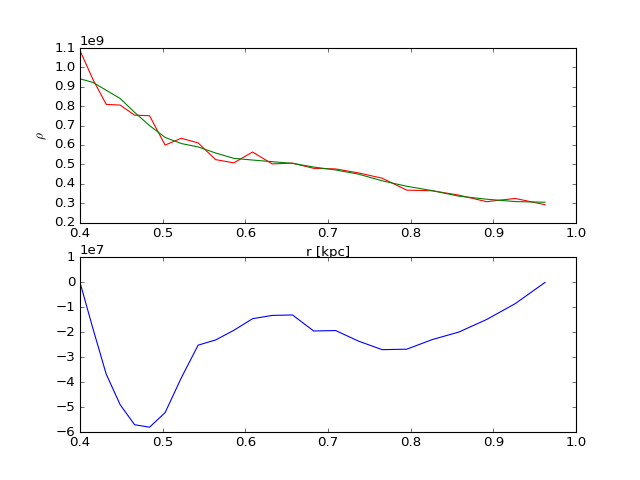

-25026340.157542557
24 24


In [416]:
hsml= 0.190 # R_P03
# R array logarithmic Bining
lnr = np.linspace(np.log10(0.4),np.log10(1.),25)
# histogram of dm particles per logarithmic bin
n_dm,r = np.histogram(myhydro.dm.r,bins=10**lnr)
# edges of bins
r1,r2 =r[:-1],r[1:]
# shell's volume
vol = 4.* np.pi * ((r2**3)-(r1**3)) / 3.
r_size = r_p[1:]-r_p[:-1]
# density per shell
lnrho = n_dm*myhydro.dm.mass.min()/vol
# center of bins
r_lnr = (r_p[:-1]+r_p[1:])/2.
rho = np.log10(lnrho)
fig, ax = plt.subplots(2,1)
ax[0].set_xlabel('r [kpc]')
ax[0].set_ylabel(r'$\rho$')

print np.mean(ysg1)

print len(ysg1), len(lnr[:-1])
ysg1 = savitzky_golay(lnrho, window_size=17, order=4,deriv=1)
ax[0].plot(10**lnr[:-1],lnrho,'r')
ax[1].plot(10**lnr[:-1],ysg1,'b')
ysg0 = savitzky_golay(lnrho, window_size=17, order=4,deriv=0)
ax[0].plot(10**lnr[:-1],ysg0,'g')


In [375]:
def savitzky_golay_piecewise(xvals, data, kernel=11, order =4):
    turnpoint=0
    last=len(xvals)
    if xvals[1]>xvals[0] : #x is increasing?
        for i in range(1,last) : #yes
            if xvals[i]<xvals[i-1] : #search where x starts to fall
                turnpoint=i
                break
    else: #no, x is decreasing
        for i in range(1,last) : #search where it starts to rise
            if xvals[i]>xvals[i-1] :
                turnpoint=i
                break
    if turnpoint==0 : #no change in direction of x
        return savitzky_golay(data, kernel, order)
    else:
        #smooth the first piece
        firstpart=savitzky_golay(data[0:turnpoint],kernel,order)
        #recursively smooth the rest
        rest=savitzky_golay_piecewise(xvals[turnpoint:], data[turnpoint:], kernel, order)
        return numpy.concatenate((firstpart,rest))

In [376]:
yy = savitzky_golay_piecewise(lnr[:-1],rho)

In [377]:
print (r_p[valid])[1] - (r_p[valid])[0]
print (r_p[valid])[5] - (r_p[valid])[4]

0.019676489116362772
0.0231119613032309


<IPython.core.display.Javascript object>


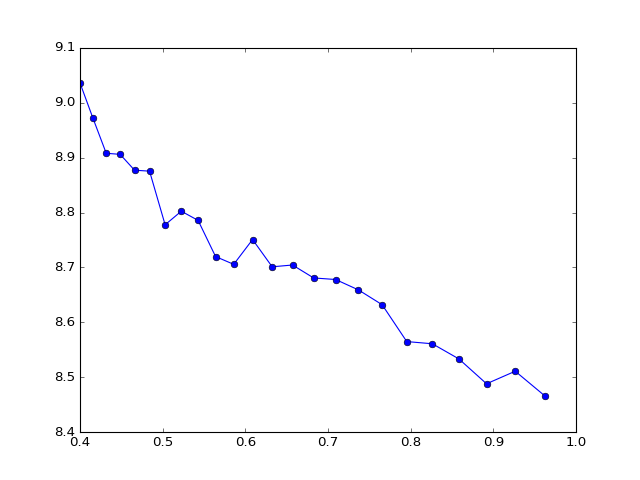

In [380]:
fig, ax = plt.subplots()

ax.plot(10**lnr[:-1],rho,'b-o')

In [330]:
print np.log(r_p[valid])

[-0.73540779 -0.69517634 -0.65494488 -0.61471343 -0.57448198 -0.53425052
 -0.49401907 -0.45378762 -0.41355617 -0.37332471 -0.33309326 -0.29286181
 -0.25263035 -0.2123989  -0.17216745 -0.131936   -0.09170454]
